#  CodSoft Internship - Task 2: Movie Rating Prediction


In [1]:
import pandas as pd
from google.colab import files

# Upload Excel file
uploaded = files.upload()

# Load it
df = pd.read_excel('/IMDb Movies India.csv.xlsx')
df.head()


Saving IMDb Movies India.csv.xlsx to IMDb Movies India.csv.xlsx


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# Show missing data
df.isnull().sum()

# Drop rows where Rating or Votes are missing
df = df.dropna(subset=['Rating', 'Votes'])

# Remove commas and convert 'Votes' to numeric
df['Votes'] = df['Votes'].astype(str).str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Clean and convert Duration
df = df.dropna(subset=['Duration']) # Drop rows with missing Duration
df['Duration'] = df['Duration'].astype(str).str.replace('min', '').astype(int)


# Drop unnecessary columns
df = df.drop(['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5851 non-null   float64
 1   Duration  5851 non-null   int64  
 2   Genre     5820 non-null   object 
 3   Rating    5851 non-null   float64
 4   Votes     5851 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 274.3+ KB


In [4]:
# Convert Genre column to list
df['Genre'] = df['Genre'].astype(str).str.split(',')

# One-hot encode multi-label genres
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_)

# Merge encoded genres with main df
df = pd.concat([df.drop('Genre', axis=1), genre_encoded], axis=1)
df.head()


,Year,Duration,Rating,Votes,Action,Adventure,Biography,Comedy,Crime,Drama,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,nan
1,-2019.0,109.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2019.0,110.0,4.4,35.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1997.0,147.0,4.7,827.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-2005.0,142.0,7.4,1086.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-2012.0,82.0,5.6,326.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing 'Rating' from the dataframe
df = df.dropna(subset=['Rating'])

# Features and target
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", round(r2_score(y_test, y_pred), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))

R² Score: 0.17
Mean Squared Error: 1.55


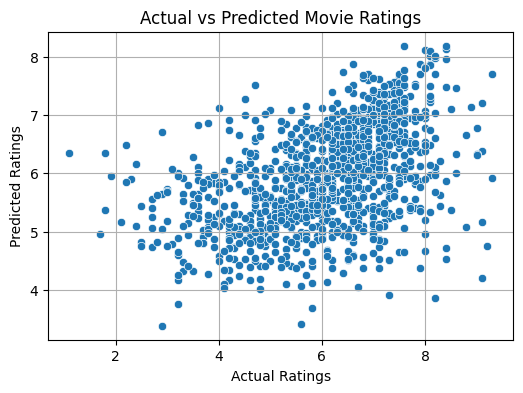

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.grid(True)
plt.show()


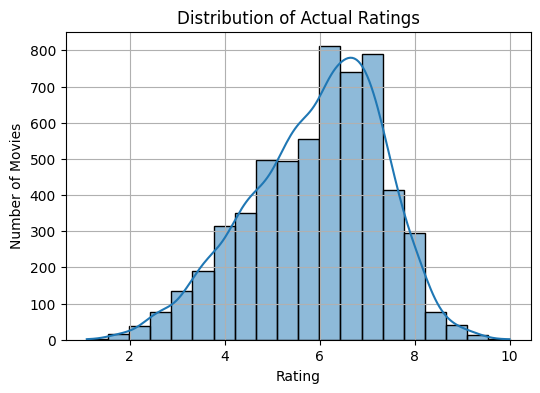

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of Actual Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()
